In [19]:
import pandas as pd
import seaborn as sns
import numpy as np

In [20]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from keras.layers import Input,Dense,Dropout
from keras.models import Model
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [21]:
data = pd.read_csv("data.csv")

In [22]:
data.head()

,year,month,day,anger_score,disgust_score,fear_score,joy_score,sadness_score,anger_count,disgust_count,fear_count,joy_count,sadness_count,close,open,high,low,change
0,2011,4,11,23.678598,1.862068,3.365532,129.260966,22.046661,28,2,4,150,26,12381.11,12380.43,12476.93,12319.35,0.0001
1,2011,4,12,23.436641,1.568504,1.807040,110.107599,28.552481,28,2,2,128,33,12263.58,12381.04,12381.04,12185.09,-0.9500
2,2011,4,13,17.595715,3.441165,3.351268,103.535217,17.206766,21,4,4,121,21,12270.99,12263.73,12372.94,12203.63,0.0006
3,2011,4,14,16.065135,4.921378,5.183304,102.417106,15.457086,19,6,6,121,18,12285.15,12270.24,12332.71,12137.98,0.0012
4,2011,4,15,16.869910,1.555661,3.334624,121.630811,14.709462,20,2,4,141,18,12341.83,12285.45,12402.61,12238.34,0.0046


In [23]:
trainable_data = data.iloc[:,13:-1]

In [24]:
trainable_label = trainable_data.iloc[:,-4:-3]

In [25]:
#2일 뒤 예측
trainable_data = trainable_data.iloc[:-2,:]
trainable_label = trainable_label.iloc[2:,:]

In [26]:
train_data = trainable_data.iloc[:-50,:]
test_data = trainable_data.iloc[-50:,:]
train_label = trainable_label.iloc[:-50,:]
test_label = trainable_label.iloc[-50:,:]

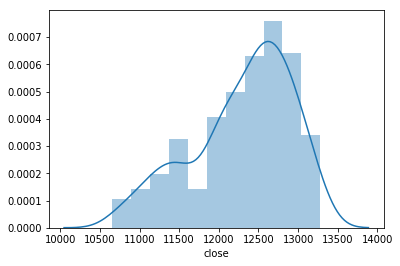

In [27]:
sns.distplot(train_data.iloc[:,0])

In [28]:
data_scaler = MinMaxScaler()
label_scaler = MinMaxScaler()
scaled_train_data = data_scaler.fit_transform(train_data)
scaled_test_data = data_scaler.transform(test_data)
scaled_train_label = label_scaler.fit_transform(train_label)
scaled_test_label = label_scaler.transform(test_label)

In [29]:
scaled_train_data = pd.DataFrame(scaled_train_data,columns = ['close','open','high','low'])
scaled_test_data = pd.DataFrame(scaled_test_data,columns = ['close','open','high','low'])
scaled_train_label = pd.DataFrame(scaled_train_label,columns = ['close'])
scaled_test_label = pd.DataFrame(scaled_test_label,columns = ['close'])

In [37]:
def train_model():
    input_layer = Input(batch_shape=(None,4))
    h1 = Dense(64,activation = 'relu')(input_layer)
    h1_1 = Dropout(0.3)(h1)
    h2 = Dense(64,activation = 'relu')(h1_1)
    h2_1 = Dropout(0.3)(h2)
    h3 = Dense(64,activation = 'relu')(h2)
    output = Dense(1,activation = 'linear')(h3)
    model = Model(inputs = input_layer,outputs = output)
    model.compile(loss='mse', optimizer = 'adam')
    return model

def percent_creation(df):
    df['percent'] = None
    for i in range(len(df)-1):
        if df.iloc[i,0] <= df.iloc[i+1,0] :
            df.iloc[i+1,-1] = 1
        else :
            df.iloc[i+1,-1] = 0
            
    return df

In [38]:
model = train_model()
model.fit(scaled_train_data,scaled_train_label,epochs = 100)

Epoch 1/100
320/320 [==============================] - 1s 2ms/step - loss: 0.3266
Epoch 2/100
320/320 [==============================] - 0s 56us/step - loss: 0.0463
Epoch 3/100
320/320 [==============================] - 0s 47us/step - loss: 0.0316
Epoch 4/100
320/320 [==============================] - 0s 56us/step - loss: 0.0195
Epoch 5/100
320/320 [==============================] - 0s 59us/step - loss: 0.0172
Epoch 6/100
320/320 [==============================] - 0s 59us/step - loss: 0.0138
Epoch 7/100
320/320 [==============================] - 0s 69us/step - loss: 0.0131
Epoch 8/100
320/320 [==============================] - 0s 65us/step - loss: 0.0114
Epoch 9/100
320/320 [==============================] - 0s 62us/step - loss: 0.0103
Epoch 10/100
320/320 [==============================] - 0s 69us/step - loss: 0.0108
Epoch 11/100
320/320 [==============================] - 0s 69us/step - loss: 0.0088
Epoch 12/100
320/320 [==============================] - 0s 62us/step - loss: 0.0094
Ep

320/320 [==============================] - 0s 53us/step - loss: 0.0056
Epoch 99/100
320/320 [==============================] - 0s 44us/step - loss: 0.0057
Epoch 100/100
320/320 [==============================] - 0s 53us/step - loss: 0.0056


In [39]:
raw_result = model.predict(scaled_test_data)
result = label_scaler.inverse_transform(raw_result)

In [40]:
test_label = test_label.reset_index().iloc[:,1:]
result = pd.DataFrame(result,columns = ['close'])

In [41]:
'''
%matplotlib tk
plt.plot(result,color = 'red')
plt.plot(test_label)
'''

In [42]:
predict_value = percent_creation(result)
predict_value = predict_value.iloc[1:,1:] 

In [43]:
real_value = percent_creation(test_label)
real_value = real_value.iloc[1:,1:]

In [44]:
accuracy_score(predict_value.values.tolist(),real_value.values.tolist())

0.5306122448979592

In [ ]:
0.5306122448979592

In [45]:
model.save_weights("2018_08_06_normal_model_01.h5")

In [ ]:
'''
model.save_weights("2018_08_06_normal_model_01.h5")의 모델
    input_layer = Input(batch_shape=(None,4))
    h1 = Dense(64,activation = 'relu')(input_layer)
    h1_1 = Dropout(0.3)(h1)
    h2 = Dense(64,activation = 'relu')(h1_1)
    h2_1 = Dropout(0.3)(h2)
    h3 = Dense(64,activation = 'relu')(h2)
    output = Dense(1,activation = 'linear')(h3)
    model = Model(inputs = input_layer,outputs = output)
    model.compile(loss='mse', optimizer = 'adam')
    return model
'''